### Step 1: Split the dataset into training and testing sets

In [ ]:
# Create Annotation File from the dataset

from utils.create_dataset import create_annotation_file
fp = "./../data_folder/"
create_annotation_file(fp)


In [ ]:
# Split the data using the annotation file

from utils.create_dataset import split_data

split_data('../dataset/annotations.csv')


### Step 2: Exploratory Data Analysis

<Axes: xlabel='type'>

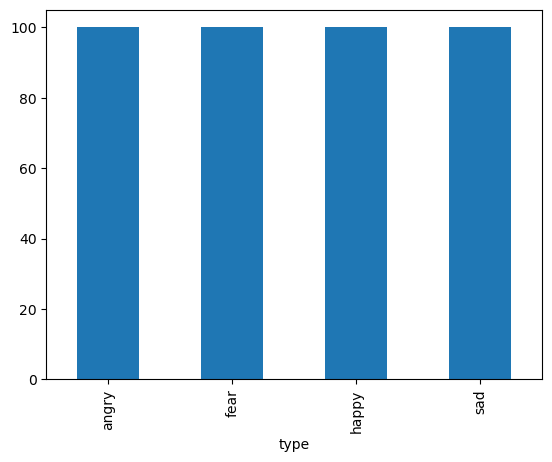

In [39]:
# Display data distributions using bar graph
from utils.create_dataset import get_annotations

df = get_annotations('../dataset/annotations.csv')
types = df.groupby('type')['filename'].count()
types.plot.bar(x='type', y='instances')

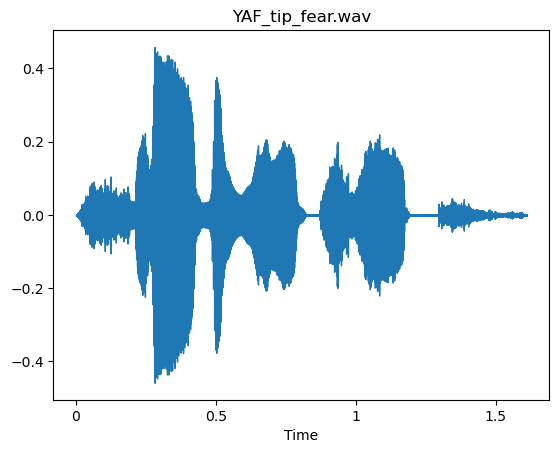

In [4]:
# Display sample audio file

from utils.data_visulization import get_waveform, plot_waveform
from utils.create_dataset import get_annotations

df = get_annotations('../dataset/annotations.csv')
sample = df.sample(n=1)
sample_path = sample['filepath'].values[0]
sample_name = sample['filename'].values[0]

fig = plot_waveform(sample_path, sample_name)